In [1]:
from time import sleep
import Pyro5.api 
import matplotlib.pyplot as plt
from TimeTagger import *
import numpy as np
from scipy.optimize import curve_fit

In [2]:
# Name of the file we want to read. 
# Remember, "Measurement.ttbin" files read all the files in sequence 'Measurement'

# file = 'C:/Users/HP/Downloads/TimeTags_RaulAir_2024-10-25_172331.ttbin' #QD_4_WF
# file = 'C:/Users/HP/Downloads/TimeTags_RaulAir_2024-10-25_180501.ttbin' #QD_4_NoF
# file = 'C:/Users/HP/Downloads/TimeTagsRaul_2024-10-31_162547.ttbin' #QD_5
# file = 'C:/Users/HP/Downloads/TimeTags_2024-11-08_125402.ttbin' #QD_6
# file = 'C:/Users/HP/Downloads/TimeTags_2024-11-08_142905.ttbin' #QD_7
# file = 'C:/Users/HP/Downloads/TimeTags_2024-11-08_150423.ttbin' #QD_8
# file = 'C:/Users/HP/Downloads/TimeTags_2024-11-08_152250.ttbin' #QD_9
# file = 'C:/Users/HP/Downloads/TimeTags_2024-11-08_154530.ttbin' #QD_10
# file = 'C:/Users/HP/Downloads/TimeTags_2024-11-08_161338.ttbin' #QD_11
# file = 'C:/Users/HP/Downloads/TimeTags_2024-11-08_162838.ttbin' #QD_12
# file = 'C:/Users/HP/Downloads/TimeTags_2024-11-08_171943.ttbin' #QD_13
# file = 'C:/Users/HP/Downloads/TimeTags_2024-11-08_173951.ttbin' #QD_14
# file = 'C:/Users/HP/Downloads/TimeTags_2024-11-11_113540.ttbin' #QD_15
# file = 'C:/Users/HP/Downloads/TimeTags_2024-11-11_124110.ttbin' #QD_16
# file = 'C:/Users/HP/Downloads/TimeTags_2024-11-11_125626.ttbin' #QD_17
# file = 'C:/Users/HP/Downloads/TimeTags_2024-11-11_143447.ttbin' #QD_18
# file = 'C:/Users/HP/Downloads/TimeTags_2024-11-11_145507.ttbin' #QD_19
# file = 'C:/Users/HP/Downloads/TimeTags_2024-11-11_150747.ttbin' #QD_20
# file = 'C:/Users/HP/Downloads/TimeTags_2024-11-11_153048.ttbin' #QD_21

# file = 'C:/Users/HP/Downloads/TimeTags_2024-11-13_143436.ttbin' #QD_28

file = 'C:/Users/HP/Downloads/TimeTagsPulsed_10MHz_2024-11-29_154713.ttbin' #QD_34

In [3]:
fr = FileReader(file)
print("All channels available: {}".format(fr.getChannelList()))

print("Has data? ->", fr.hasData())
# Returns: True if more data is available for reading, False if all data has been read from all the files specified in the class constructor.

All channels available: (1, 2)
Has data? -> True


In [4]:
# Now we are going to print all the configuration of the TT-Ultra at the moment of the measurement
config = fr.getConfiguration()

for key, value in config.items():
    print(f"{key}: {value}")

channel number scheme: 2
configure version: 1
current time: 2024-11-29 15:47:13 +0100
devices: [{'FPGA ID': 11493476189726804, 'PCB UID': '00fdf287', 'PCB version': '1.8 (1)', 'minimum software version': '2.10.6', 'model': 'Time Tagger Ultra', 'serial': '2410001ABQ'}]
firmware version: TT-Ultra, FW6, TS 2024-02-09 12:21:10, OK 1.46
fpga link: {'enabled': False}
hardware buffer size: 67108864
inputs: [{'average rising falling': [False, False], 'channel': [1, -1], 'conditional filter filtered': [False, False], 'conditional filter triggers': [False, False], 'deadtime': [2000, 2000], 'delay hardware': [0, 0], 'delay software': [0, 0], 'event divider': [1, 1], 'hardware delay compensation': [333, 333], 'high priority channel': [False, False], 'input hysteresis': 0, 'input impedance high': False, 'input mux': 0, 'normalization': [True, True], 'resolution': 'Standard', 'resolution rms': 42.0, 'trigger level': 0.5}, {'average rising falling': [False, False], 'channel': [2, -2], 'conditional fi

In [5]:
virtual_tagger = createTimeTaggerVirtual()
virtual_tagger.getConfiguration()

{'configure version': 1,
 'current time': '2024-11-30 13:07:53 +0100',
 'hardware configuration': None,
 'measurements': [],
 'replay speed': -1.0,
 'software clock': None,
 'software version': '2.17.4',
 'virtual inputs': []}


Correlation measurement is running.

Rate of counts channel 1 (counts/sec) : 3321.151225359739
Total counts channel 1 : 5058470
Rate of counts channel 2 (counts/sec) : 4215.301567034494
Total counts channel 2 : 6420357


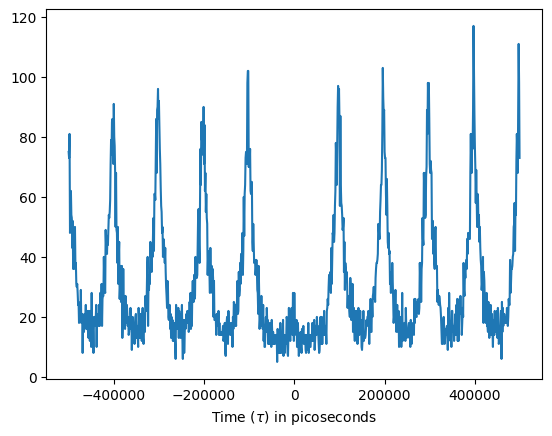

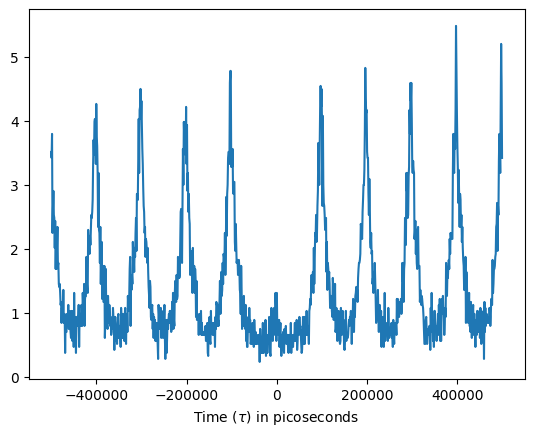

In [6]:
# measure photon antibunching
corr_ch1 = config['registered channels'][0] # first photon channel for antibunching measurements
corr_ch2 = config['registered channels'][1] # second photon channel for antibunching measurements
bwcorr = 1000 # 1 ns
nbins = 1000

corr = Correlation(virtual_tagger, corr_ch1, corr_ch2, bwcorr, nbins)
cr = Countrate(virtual_tagger, [corr_ch1, corr_ch2])
print("\nCorrelation measurement is running.\n")


virtual_tagger.setReplaySpeed(-1.0) # Speed of -1.0 will replay the data as fast as possible
virtual_tagger.replay(file, begin = 0, duration = -1) # collect data until the end 
#virtual_tagger.replay(file, duration=8*10e11) # collect only 1 sec. of data (duration in picoseconds)
virtual_tagger.waitForCompletion()

# normalized correlation -> Photon Antibunching
xcorr = corr.getIndex()
ycorr_norm = corr.getDataNormalized()
ycorr = corr.getData()

rate_ch1 = cr.getData()[0]
rate_ch2 = cr.getData()[1]
counts_ch1 = cr.getCountsTotal()[0]
counts_ch2 = cr.getCountsTotal()[1]

print(f"Rate of counts channel {corr_ch1} (counts/sec) : {cr.getData()[0]}")
print(f"Total counts channel {corr_ch1} : {cr.getCountsTotal()[0]}")
print(f"Rate of counts channel {corr_ch2} (counts/sec) : {cr.getData()[1]}")
print(f"Total counts channel {corr_ch2} : {cr.getCountsTotal()[1]}")

plt.plot(xcorr, ycorr)
plt.xlabel(r'Time ($\tau$) in picoseconds')
plt.show()

plt.plot(xcorr, ycorr_norm)
plt.xlabel(r'Time ($\tau$) in picoseconds')
plt.show()

## Data analysis

In [7]:
# Function to plot the data
def plot_data(tau, counts, width=10, height=6):
    plt.figure(figsize=(width, height))
    plt.plot(tau, counts, marker='o', linestyle='-', color='b', markersize=3, linewidth=0.7)
    plt.title('Auto-correlation graph')
    plt.xlabel('Time differences (ps)')
    plt.ylabel('Counts per bin')
    plt.grid(True)
    plt.show()

Capture duration (seconds):  1523.1073976320001


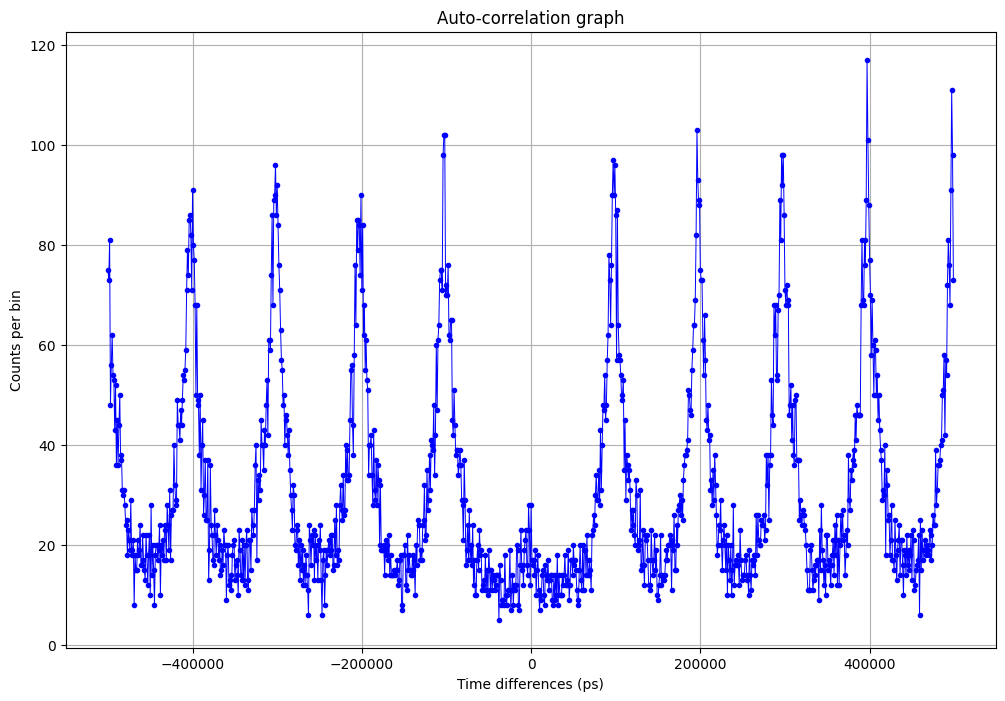

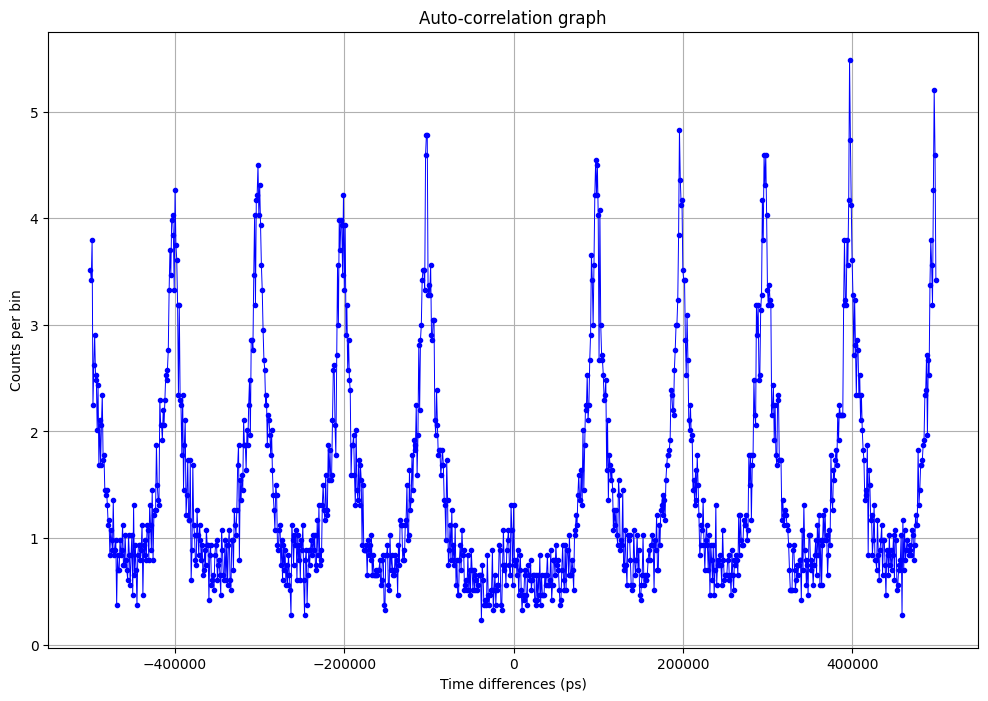

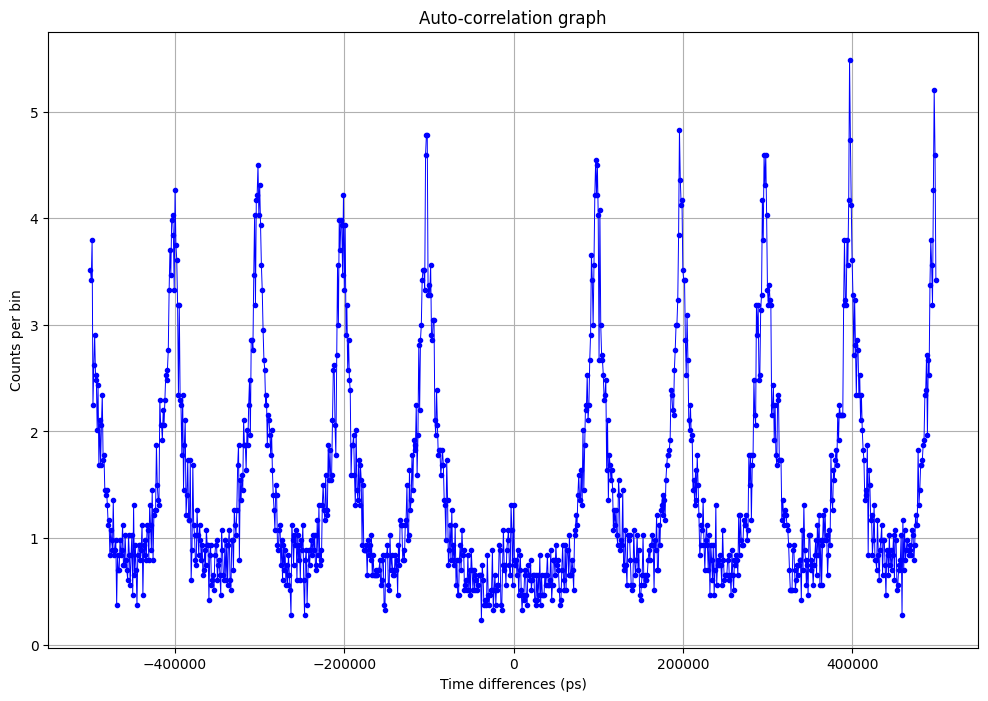

In [8]:
# Normalize counts 
capture_duration = np.mean([counts_ch1/rate_ch1, counts_ch2/rate_ch2]) * 1e12 # Capture duration in picoseconds
print("Capture duration (seconds): ", np.mean([counts_ch1/rate_ch1, counts_ch2/rate_ch2]))
counts_normalized = (ycorr  * capture_duration)/(bwcorr * counts_ch1 * counts_ch2) 

plot_data(xcorr, ycorr, width=12, height=8)
plot_data(xcorr, counts_normalized, width=12, height=8)
plot_data(xcorr, ycorr_norm, width=12, height=8)
    

In [ ]:

# Define the fitting function: a * (1 - b * exp(abs(tau - t0) / tau0)
def fitting_function(tau, t_0, tau_0, a, b):
    return a * (1 - b * np.exp(-np.abs(tau - t_0) / tau_0))

# Function to normalize counts and fit the data
def fit_noblinking(tau, counts):
    
    # Perform the curve fitting
    popt, pcov = curve_fit(fitting_function, tau, counts, p0=[0, 1e5, 1, 1])
    
    # Extract fitted parameters
    t_0, tau_0, a, b = popt
    
    # Calculate the standard deviations of the parameters
    perr = np.sqrt(np.diag(pcov))
    error_t0, error_tau0, error_a, error_b = perr

    # Print fitted parameters and their errors
    print(f"Fitted parameters:\n t₀ = {t_0:.3f} ± {error_t0:.3f} ps \n a = {a:.3f} ± {error_a:.3f} \n b = {b:.3f} ± {error_b:.3f}")
    print(f"Lifetime = {tau_0 / 1000:.2f} ± {error_tau0 / 1000:.2f} ns")
    
    # Calculate g²(τ = t₀)
    value_at_t_0 = fitting_function(t_0, t_0, tau_0, a, b)
    error_value_at_t_0 = np.sqrt(error_a**2 + error_b**2)  # Estimate error propagation
    print(f"g²(τ = t₀) = {value_at_t_0:.3f} ± {error_value_at_t_0:.3f}")
    
    return t_0, tau_0, a, b

# Function to plot the normalized data and the fitted curve
def plot_fit_noblinking(tau, counts, t_0, tau_0, a, b, width=10, height=6):
    # Create the plot
    plt.figure(figsize=(width, height))
    
    # Plot normalized data
    plt.plot(tau, counts, marker='o', linestyle='-', color='b', label='Normalized Data', markersize=3, linewidth=0.7)
    plt.title('Normalized auto-correlation graph')
    
    # Generate the fitted curve
    tau_fine = np.linspace(min(tau), max(tau), 10000)
    fitted_curve = fitting_function(tau_fine, t_0, tau_0, a, b)
    
    # Plot fitted curve
    plt.plot(tau_fine, fitted_curve, 'r-', label=f'Fit: t₀={t_0:.2f}ps, τ₀={tau_0:.2f}ps, g²(τ = t₀) = {a-b:.3f}')
    
    # Add title and labels
    plt.title('Normalized auto-correlation graph')
    plt.xlabel('Time differences (ps)')
    plt.ylabel('Normalized Counts')
    #plt.legend()
    plt.grid(True)
    plt.show()


In [ ]:
# Define the fitting function: 1 - C * exp(abs(tau - t0) / tau0)
def fitting_function_blinking(tau, t_0, tau_0, p):
    return 1 - ((1-p)/p) * np.exp(-np.abs(tau - t_0) / tau_0)

# Function to normalize counts and fit the data
def fit_blinking(tau, counts):    
    # Perform the curve fitting
    popt, pcov = curve_fit(fitting_function_blinking, tau, counts, p0=[0, 1e5, 1])
    
    # Extract fitted parameters
    t_0, tau_0, p = popt
    
    # Calculate the standard deviations of the parameters
    perr = np.sqrt(np.diag(pcov))
    error_t0, error_tau0, error_p = perr

    # Print fitted parameters and their errors
    print(f"Fitted parameters: t₀ = {t_0:.2f} ± {error_t0:.2f} ps")
    print(f"Lifetime = {tau_0 / 1000:.2f} ± {error_tau0 / 1000:.2f} ns")
    print(f"p = {p:.2f} ± {error_p:.2f}")
    
    # Calculate g²(τ = t₀)
    value_at_t_0 = fitting_function_blinking(t_0, t_0, tau_0, p)
    error_value_at_t_0 = error_p/(p**2)  # Estimate error propagation
    print(f"g²(τ = t₀) = {value_at_t_0:.3f} ± {error_value_at_t_0:.3f}")
    
    return t_0, tau_0, p

# Function to plot the normalized data and the fitted curve
def plot_fit_blinking(tau, counts, t_0, tau_0, p, width=10, height=6):
    # Create the plot
    plt.figure(figsize=(width, height))
    
    # Plot normalized data
    plt.plot(tau, counts, marker='o', linestyle='-', color='b', label='Normalized Data', markersize=3, linewidth=0.7)
    plt.title('Normalized auto-correlation graph')
    
    # Generate the fitted curve
    tau_fine = np.linspace(min(tau), max(tau), 10000)
    fitted_curve = fitting_function_blinking(tau_fine, t_0, tau_0, p)
    
    # Plot fitted curve
    value_at_t_0 = fitting_function_blinking(t_0, t_0, tau_0, p)
    plt.plot(tau_fine, fitted_curve, 'r-', label=f'Fit: t₀={t_0:.2f}ps, τ₀={tau_0:.2f}ps, g²(τ = t₀) = {value_at_t_0:.3f}')
    
    # Add title and labels
    plt.title('Normalized auto-correlation graph')
    plt.xlabel('Time differences (ps)')
    plt.ylabel('Normalized Counts')
    plt.legend()
    plt.grid(True)
    plt.show()

Fitted parameters:
 t₀ = -3000.051 ± 710.686 ps 
 a = 1.457 ± 0.005 
 b = 0.579 ± 0.042
Lifetime = 13.85 ± 1.46 ns
g²(τ = t₀) = 0.614 ± 0.042


C:\Users\HP\AppData\Local\Temp\ipykernel_15504\294753497.py:3: RuntimeWarning: overflow encountered in exp
  return a * (1 - b * np.exp(-np.abs(tau - t_0) / tau_0))


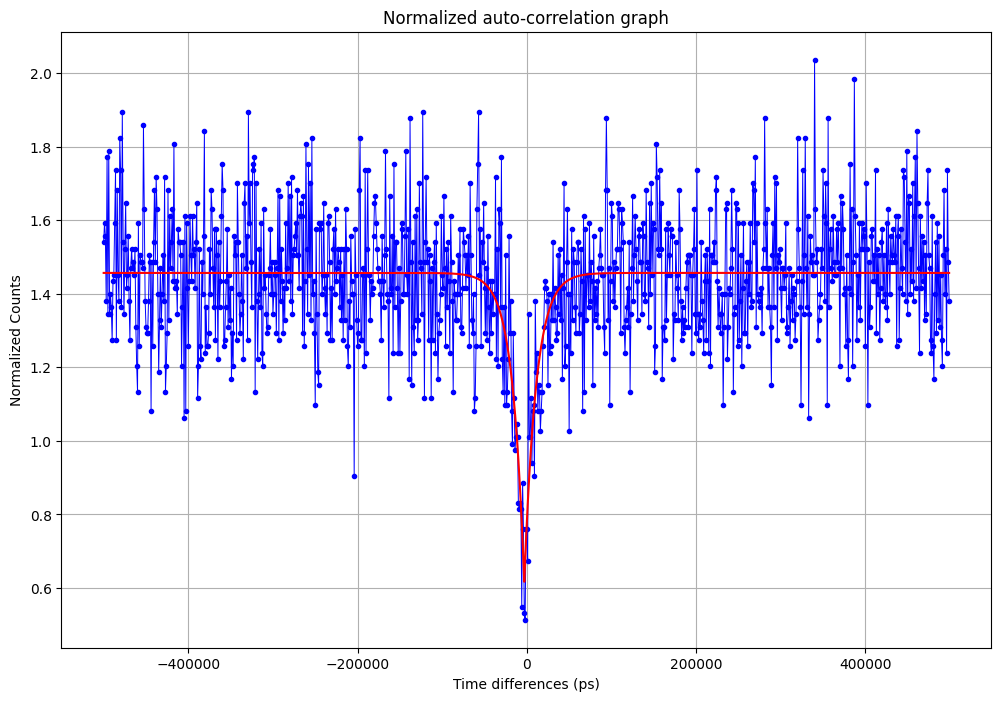

Fitted parameters: t₀ = 568316.17 ± 485206416969.72 ps
Lifetime = 31476.03 ± 46712.86 ns
p = 1.79 ± 21837.65
g²(τ = t₀) = 1.441 ± 6812.952


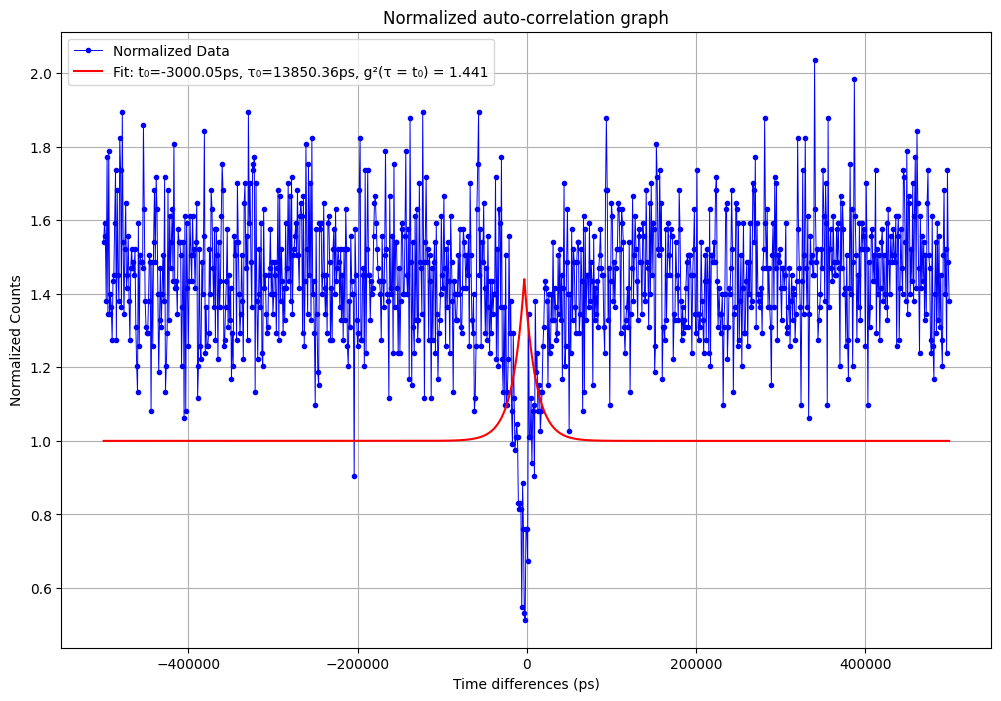

In [ ]:
t_0, tau_0, a, b = fit_noblinking(xcorr, counts_normalized)
# Plot the normalized data and the fitted curve
plot_fit_noblinking(xcorr, counts_normalized, t_0, tau_0, a, b, width=12, height=8)
    
t_0_blinking, tau_0_blinking, p = fit_blinking(xcorr, counts_normalized)
# Plot the normalized data and the fitted curve
plot_fit_blinking(xcorr, counts_normalized, t_0, tau_0, p, width=12, height=8)

C:\Users\HP\AppData\Local\Temp\ipykernel_15504\2071120053.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


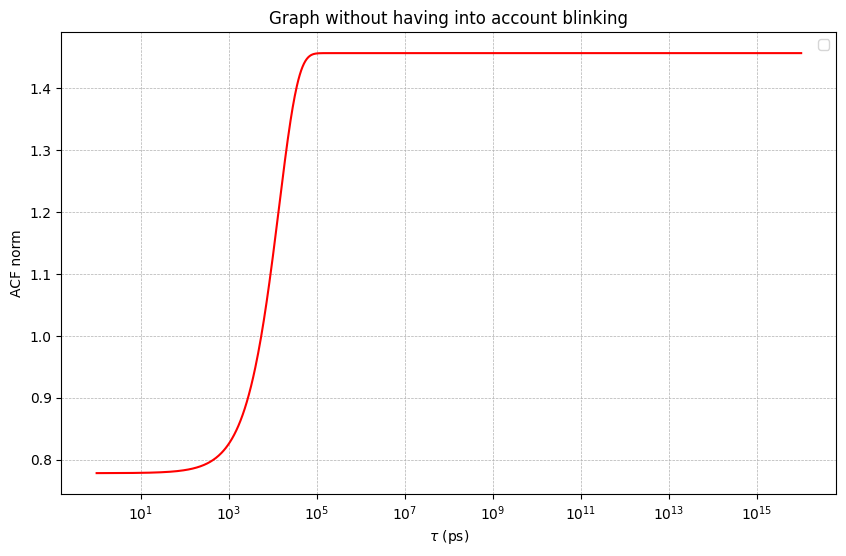

C:\Users\HP\AppData\Local\Temp\ipykernel_15504\2071120053.py:27: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


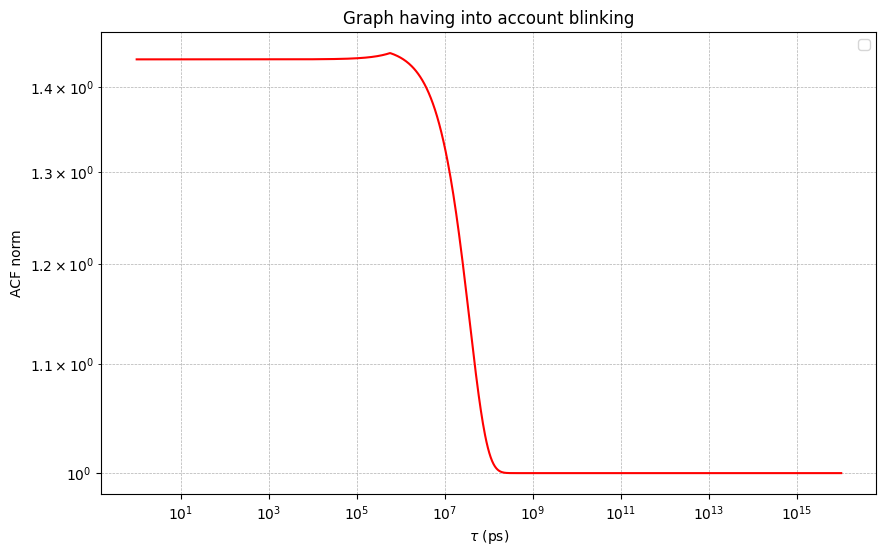

In [ ]:
# Rango de tau: desde 10e-9 hasta 10e3
tau_values = np.logspace(0, 16, 1000)  # Espaciado logarítmico

# Calcula los valores de la función sin blinking
fitting_values = fitting_function(tau_values, t_0, tau_0, a, b)
# Gráfica
plt.figure(figsize=(10, 6))
plt.plot(tau_values, fitting_values, color='r')
plt.xscale('log')
plt.title('Graph without having into account blinking')
plt.xlabel(r'$\tau$ (ps)')
plt.ylabel('ACF norm')
plt.legend()
plt.grid(True, which="both", linestyle='--', linewidth=0.5)
plt.show()

# Calcula los valores de la función con blinking
fitting_values = fitting_function_blinking(tau_values, t_0_blinking, tau_0_blinking, p)
# Gráfica
plt.figure(figsize=(10, 6))
plt.plot(tau_values, fitting_values, color='r')
plt.xscale('log')
plt.yscale('log')
plt.title('Graph having into account blinking')
plt.xlabel(r'$\tau$ (ps)')
plt.ylabel('ACF norm')
plt.legend()
plt.grid(True, which="both", linestyle='--', linewidth=0.5)
plt.show()